<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.tree import plot_tree

# 1. Φόρτωση Δεδομένων

In [10]:
dataset = pd.read_csv('/content/water_potability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Περιγραφή Features

In [11]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Ιστόγραμμα για κάθε Feature & Ραβδόγραμμα για το Potability

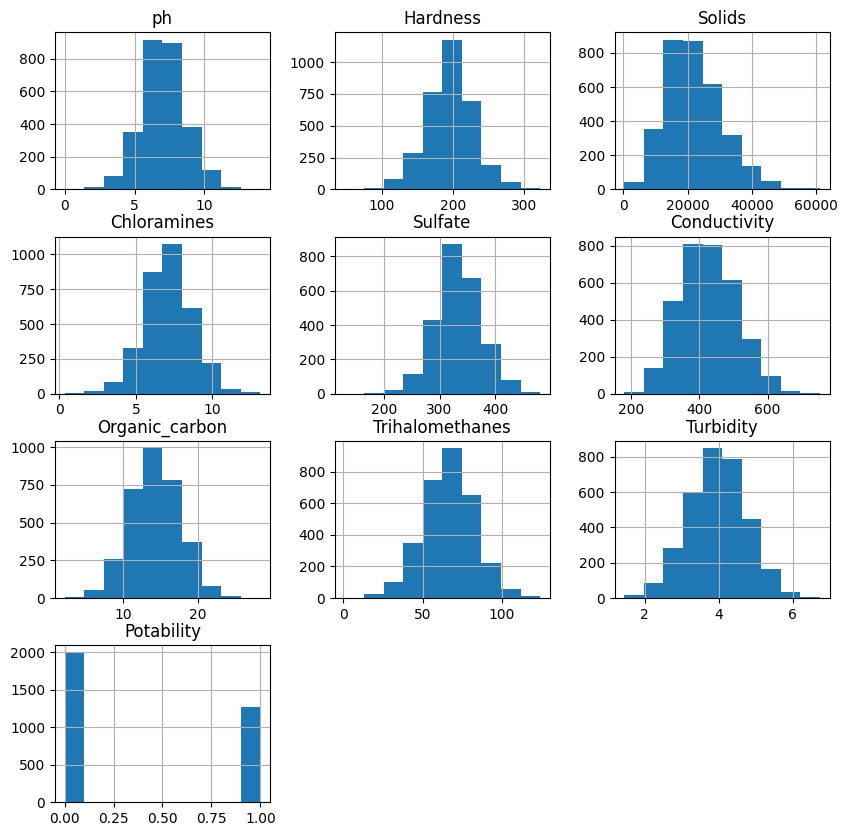

In [12]:
dataset.hist(figsize=(10, 10))
sns.countplot(x='Potability', data=dataset)
plt.show()

# Πλήθος των ελλειπών τιμών για κάθε χαρακτηριστικό και ποσοστά πόσιμου και μη-πόσιμου νερού

In [13]:
missing_counts = dataset.isnull().sum()
print(missing_counts)
print('\n')
percentages = dataset['Potability'].value_counts(normalize=True) * 100
print(percentages)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


# Ποιότητα Δεδομένων

Ενώ η κατανομή των δεδομένων φαίνεται να είναι ικανοποιητική, χωρίς ακραίες τιμές και ακολουθώντας κατανομή Gauss, υπάρχει μεγάλο ποσοστό ελλειπών τιμών και ιδιαίτερα σε σημαντικά χαρακτηριστικά όπως το Ph. Οπότε η ποιότητα των δεδομένων δεν είναι ικανοποιητική.

# 2. Ποσοστά πόσιμου και μη-πόσιμου νερού

In [14]:
ph_percentage_1 = (dataset['ph'] < 6.5).mean() * 100
print(f"{ph_percentage_1:.2f}% of samples have Ph less than 6.5.")
ph_percentage_2 = (dataset['ph'].between(6.5, 8.5)).mean() * 100
print(f"{ph_percentage_2:.2f}% of samples have Ph between 6.5 and 8.5.")
ph_percentage_3 = (dataset['ph'] > 8.5).mean() * 100
print(f"{ph_percentage_3:.2f}% of samples have Ph more than 8.5.")
ph_percentage_4 = (dataset['ph'].isnull()).mean() * 100
print(f"{ph_percentage_4:.2f}% of samples have Ph null.")

29.55% of samples have Ph less than 6.5.
40.54% of samples have Ph between 6.5 and 8.5.
14.93% of samples have Ph more than 8.5.
14.99% of samples have Ph null.


Άρα σύμφωνα με τον Π.Ο.Υ. το ποσοστό πόσιμου νερού στο δείγμα είναι 40.54%.

# 3. Διάγραμμα διασποράς pH και Χλωραμίνης για πόσιμα ή μη πόσιμα δειγματα.

0.92% of samples are potable.


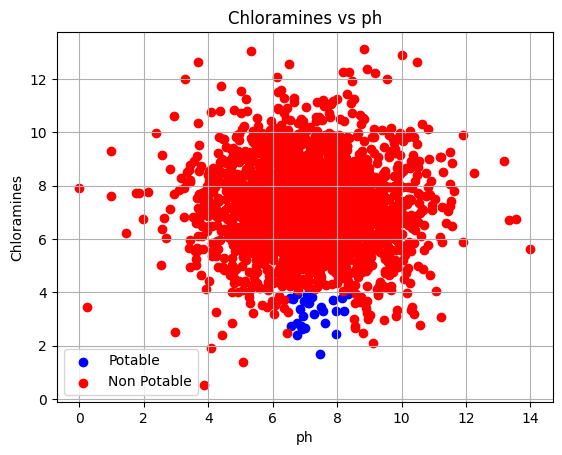

In [15]:
potability = (dataset['Chloramines'] <= 4) & (dataset['ph'].between(6.5, 8.5))
potability_percentage = potability.mean() * 100
print(f"{potability_percentage:.2f}% of samples are potable.")

plt.scatter(dataset.loc[potability, 'ph'], dataset.loc[potability, 'Chloramines'], color='blue', label='Potable')
plt.scatter(dataset.loc[~potability, 'ph'], dataset.loc[~potability, 'Chloramines'], color='red', label='Non Potable')

plt.xlabel('ph')
plt.ylabel('Chloramines')
plt.title('Chloramines vs ph')
plt.legend()
plt.grid(True)
plt.show()

Φαίνεται να υπάρχει καλή διαχωρισιμότητα των παραδειγμάτων αφού δεν επικαλύπτονται ιδιαίτερα μεταξύ τους και τα παραδείγματα πόσιμο νερού είναι συγκεντρωμένα σε μια συγκεκριμένη περιοχή.

# 4. Συμπλήρωση ελλειπών τιμών

In [16]:
dataset['ph'] = dataset['ph'].fillna(dataset['ph'].mean())
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset['Sulfate'].mean())
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean())

# 5. Δημιουργία Train-Test Δεδομένων (70% - 30%)

In [17]:
input_dataset = dataset.drop(columns=['Potability'])
targets_dataset = dataset['Potability']

x = input_dataset.to_numpy()
y = targets_dataset.to_numpy()

seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# 6. Εφαρμογή Decision Tree στο train/test set

In [18]:
model = DecisionTreeClassifier(random_state=0)

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Decision Tree Train Accuracy: {accuracy_train:.4f}")
print(f"Decision Tree Test Accuracy: {accuracy_test:.4f}")

Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.5748


# 7. Συνδυασμοί και ποσοστά ακριβείας πρόβλεψης

In [22]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]

combinations = list(itertools.product(
    criteria,
    max_depths,
    min_samples_splits,
    min_samples_leafs,
    max_features_list,
    ccp_alphas
))

results = []

for criterion, max_depth, min_split, min_leaf, max_features, ccp_alpha in combinations:
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha,
        random_state=0
    )

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

df_results = pd.DataFrame(results)

df_results = df_results.sort_values(by='test_acc', ascending=False).reset_index(drop=True)

print(df_results)

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0    entropy        5.0                  5                 2         None   
1    entropy        5.0                  2                 2         None   
2    entropy        5.0                  2                 1         None   
3    entropy        5.0                  5                 1         None   
4       gini        5.0                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        NaN                  5                 2         None   
92   entropy        NaN                  2                 1         None   
93      gini        NaN                  2                 1         None   
94   entropy        NaN                  5                 1         None   
95      gini        NaN                  5                 1         None   

    ccp_alpha  train_acc  test_acc  
0         0.0   0.671173  0.655137  
1

# 8. Καλύτερος συνδυασμός

In [23]:
best_row = df_results[df_results['max_depth'] == 3].sort_values(by='test_acc', ascending=False).iloc[0]
print(best_row)

criterion             entropy
max_depth                 3.0
min_samples_split           2
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_acc            0.641082
test_acc             0.639878
Name: 8, dtype: object


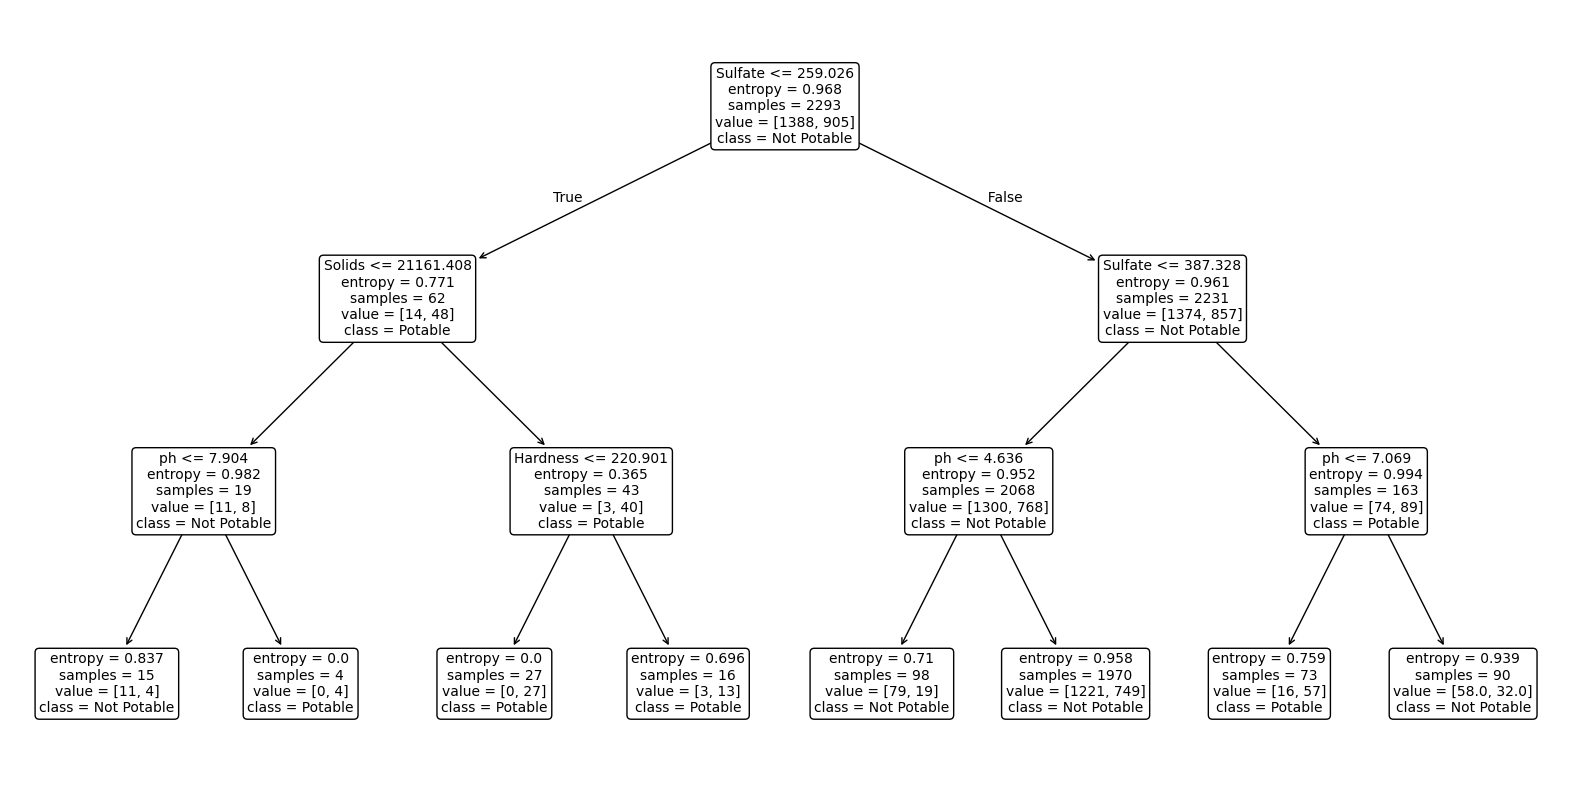

In [31]:
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    ccp_alpha=0,
    random_state=0
)

best_model.fit(x_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=input_dataset.columns,
          class_names=['Not Potable', 'Potable'],
          rounded=True,
          fontsize=10)
plt.show()

Οι κανόνες που βλέπουμε είναι οι εξής:
1.   Sulfate <= 259.026 && Solids <= 211611.408 && ph <= 7.904 = Not Potable
2.   Sulfate <= 259.026 && Solids <= 211611.408 && ph >= 7.904 = Potable
3.   Sulfate <= 259.026 && Solids >= 211611.408 = Potable
4.   Sulfate >= 259.026 && Sulfate <= 387.328 = Not Potable
5.   Sulfate >= 259.026 && Sulfate <= 387.328 && ph <= 7069 = Potable
6.   Sulfate >= 259.026 && Sulfate <= 387.328 && ph >= 7069 = Not Potable

# 9. Ραβδόγραμμα με σημαντικότητα κάθε χαρακτηριστικού

           Feature  Importance
4          Sulfate    0.418179
0               ph    0.398931
2           Solids    0.136534
1         Hardness    0.046356
3      Chloramines    0.000000
5     Conductivity    0.000000
6   Organic_carbon    0.000000
7  Trihalomethanes    0.000000
8        Turbidity    0.000000


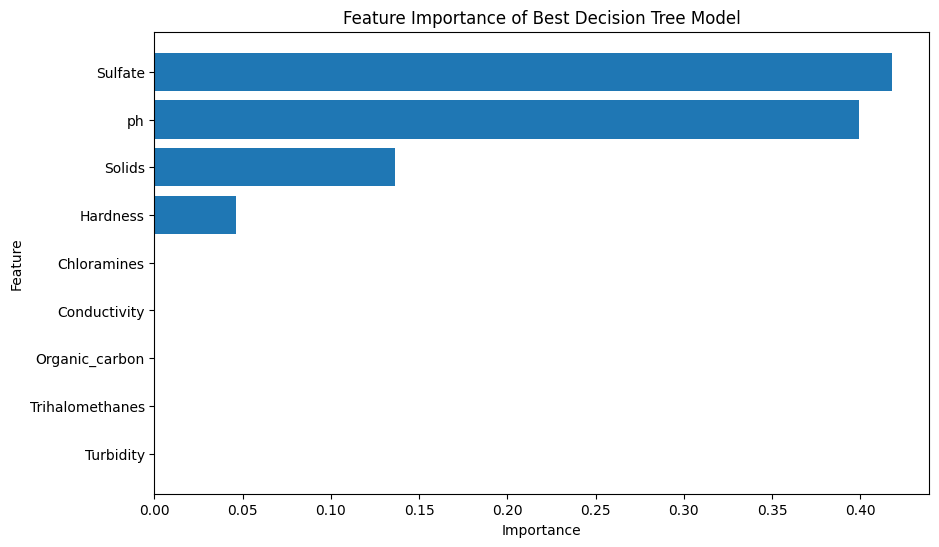

In [35]:
importances = best_model.feature_importances_
features = input_dataset.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Best Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()

# 11. Decision Tree ή Random Forest

Το Random Forest αποτελείται από πολλά Decision Trees (π.χ. 100, 200), τα οποία εκπαιδεύονται με τυχαιότητα γιατί παίρνουν τυχαία χαρακτηριστικά κάθε φορά και συνδυάζουν τις προβλέψεις τους. Αυτό, σε αντίθεση με τα Decision Trees, τα κάνει λιγότερο επιρρεπή στο overfitting δηλαδή να εκπαιδευτούν πολύ καλά στο train set αλλά να αποτυγχάνουν στa test set με τα νέα δεδομένα όπως και λιγότερο επιρρεπή σε δεδομένα με ακραίες τιμές. Η αποφυγή του overfitting προκύπτει επειδή κάθε δέντρο βλέπει διαφορετικά δεδομένα και χαρακτηριστικά και τα σφάλματά τους δεν είναι ίδια. Ο συνδυασμός πολλών "μέτριων" δέντρων παράγει ένα σταθερό και πιο γενικεύσιμο μοντέλο.

# 12. Random Forest

In [20]:
estimators_list = [50, 100, 200]
results = {}

for n in estimators_list:
    RandomForest_model = RandomForestClassifier(
        n_estimators=n,
        random_state=0
    )
    RandomForest_model.fit(x_train, y_train)

    y_train_pred = RandomForest_model.predict(x_train)
    y_test_pred = RandomForest_model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results[n] = {'train_acc': train_acc, 'test_acc': test_acc}

for n, acc in results.items():
    print(f"n_estimators={n} -> Train Acc: {acc['train_acc']:.3f}, Test Acc: {acc['test_acc']:.3f}")

n_estimators=50 -> Train Acc: 1.000, Test Acc: 0.694
n_estimators=100 -> Train Acc: 1.000, Test Acc: 0.698
n_estimators=200 -> Train Acc: 1.000, Test Acc: 0.690


# 13. Σημαντική πρόβλεψη

Όπως και στην προηγούμενη εργασία, το σημαντικό στην πρόβλεψη είναι να αποφευχθεί ο κίνδυνος. Είναι δηλαδή προτιμότερο να προβλεφθεί ένα δείγμα ως μη πόσιμο και τελικά να μην ισχύει, παρά το αντίστροφο όπου θα μπορούσε να θέσει σε κίνδυνο την ανθρώπινη υγεία ή την βιωσιμότητα επενδύσεων.

# 14. Νομικά ασφαλέστερο μοντέλο

Νομικά ασφαλέστερο μοντέλο είναι το Τυχαίο Δάσος καθώς παρά το μεγαλύτερο κόστος του, καταφέρνει να παράγει καλύτερες προβλέψεις και είναι λιγότερο επιρρεπές σε ακραίες τιμές ή άνισα κατανεμημένα δεδομένα. Ιδιαίτερα αυξάνοντας τον αριθμό του πλήθους δένδρων. Τα αποτελέσματα της ακρίβειας πρόβλεψης που προέκυψαν το επιβεβαιώνουν.